In [172]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from functions import image_preprocessing, CC_img, weighted_hough_line, sliding_window_hough_line

In [193]:
def show(imgs, size = (10,10)):
    l = len(imgs)
    fig, axes = plt.subplots(1,l,figsize = size)
    plt.setp(axes, xticks=[], yticks=[])
    for i in range(l):
        axes[i].imshow(imgs[i])
    plt.show()

## Loading images

In [211]:
full_img = cv2.imread('images/back.jpg')
cropped_img = cv2.imread('images/cropped_back.png')

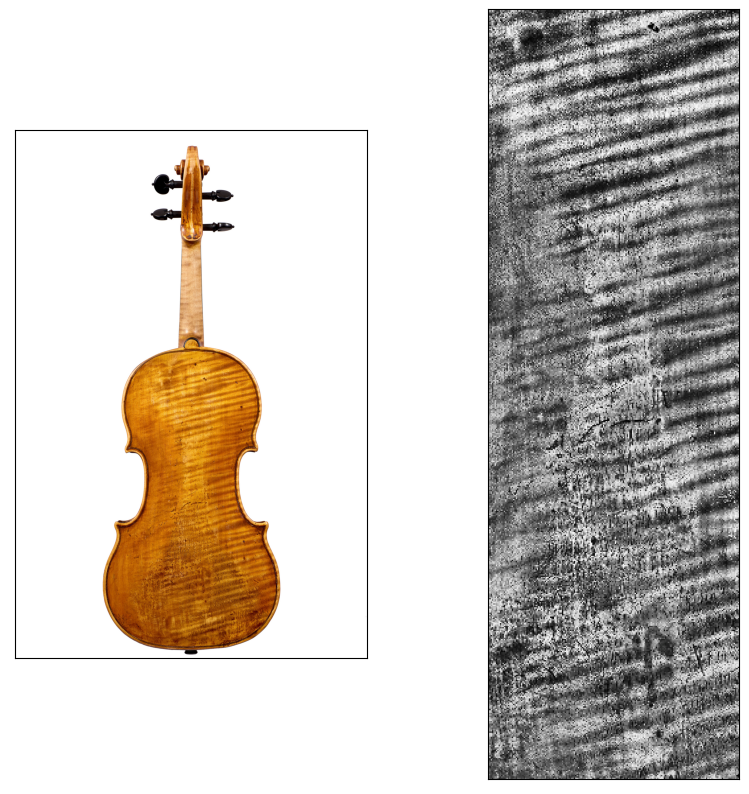

In [212]:
show((full_img[:,:,::-1], cropped_img))

## Preprocessing cropped image

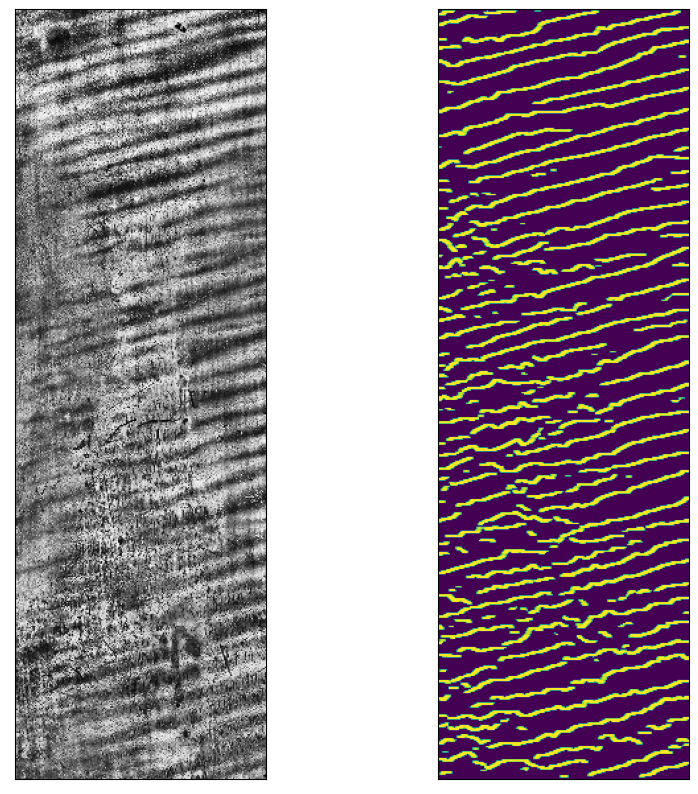

In [213]:
img = image_preprocessing(cropped_img)

show((cropped_img, img))

## Assign weights to pixels

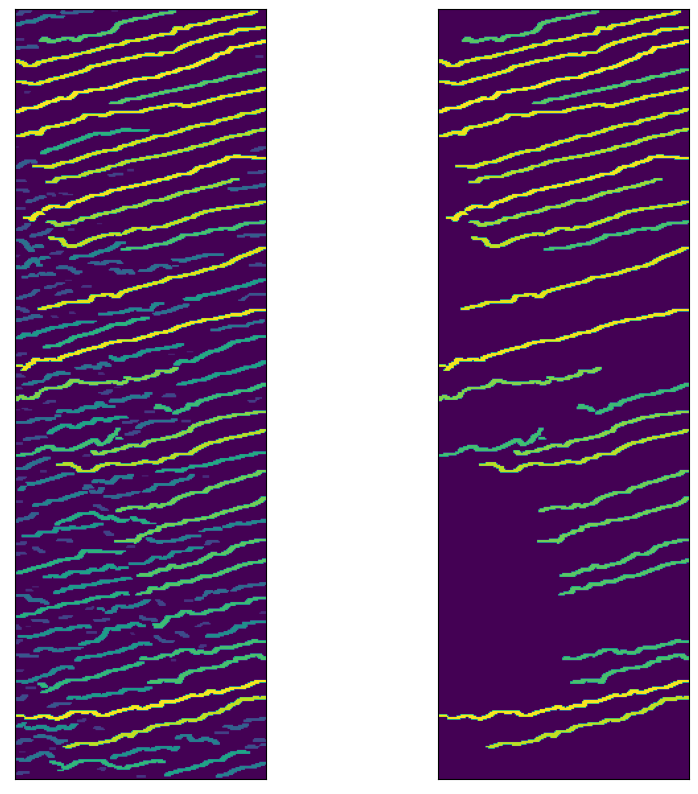

In [214]:
unfiltered_weighted_img = CC_img(img, filter = False)
filtered_weighted_img = CC_img(img, filter = True)

show((unfiltered_weighted_img, filtered_weighted_img))

## Apply classic hough line detection (c), weighted hough (w) and sliding window weighted hough (sw)

In [215]:
theta = np.linspace(0, np.pi, 180) # no restriction in the angular scope of the hough algorithm
c_accum, _, dists = hough_line(img, theta)
w_accum, _, _ = weighted_hough_line(filtered_weighted_img, theta)
sw_accum, _, _ = sliding_window_hough_line(filtered_weighted_img, theta)

In [216]:
# NMS + threshold to retrieve prominent lines
c_votes, c_angle, c_dist = hough_line_peaks(c_accum, theta, dists)
w_votes, w_angle, w_dist = hough_line_peaks(w_accum, theta, dists)
sw_votes, sw_angle, sw_dist = hough_line_peaks(sw_accum, theta, dists)

In [217]:
#draw lines on original image
def draw_lines(img, angles, dists):
    if len(img.shape) == 2:
        img_ = np.stack((img.copy(),)*3, axis=-1)
    else:
        img_ = img.copy()
        
    for angle, dist in zip(angles, dists):
        a = np.cos(angle)
        b = np.sin(angle)
        x0 = a*dist
        y0 = b*dist
        x1 = round(x0+1000*(-b))
        y1 = round(y0+1000*a)
        x2 = round(x0-1000*(-b))
        y2 = round(y0-1000*a)
        cv2.line(img_, (x1, y1), (x2, y2), (0,255,0), 2)
    return img_



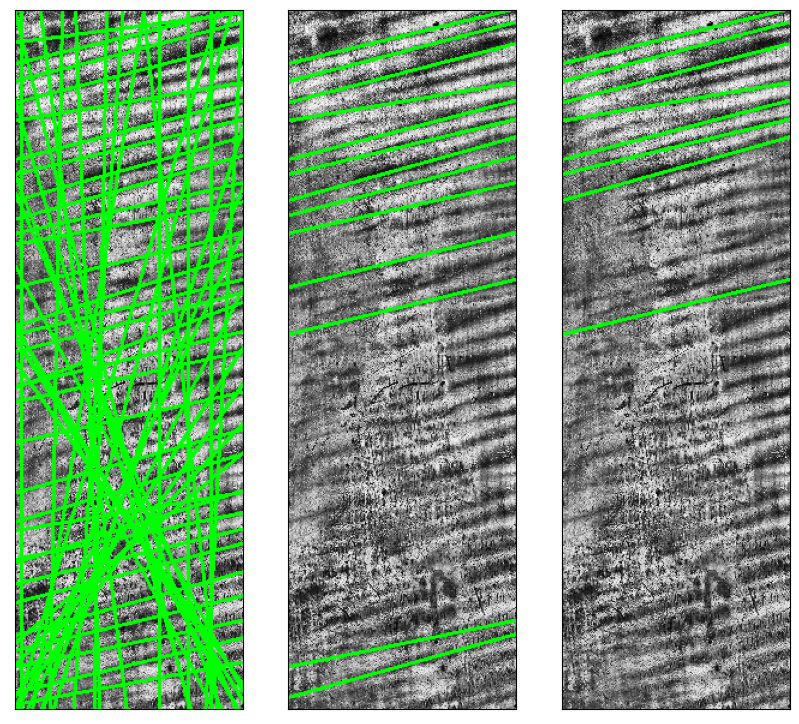

In [218]:
c_lines = draw_lines(cropped_img, c_angle, c_dist)
w_lines = draw_lines(cropped_img, w_angle, w_dist)
sw_lines = draw_lines(cropped_img, sw_angle, sw_dist)

show((c_lines, w_lines, sw_lines))